
To implement the K-Means clustering algorithm from scratch and analyse its performance on a given or generated datasets.
Write a Python programme to implement the K-Means clustering algorithm from scratch.
1. Accept the dataset and the number of clusters (K) as input.
2. Initialise centroids randomly.
3. Iteratively assign data points to the nearest centroid and update the centroids until convergence.
4. Return the final cluster labels and centroids.
5. Visualize the clusters and centroids using a scatter plot (e.g., using Matplotlib or Seaborn).
6. Analyse the impact of different random initialisations on the clustering results.
7. Discuss the convergence criteria and the number of iterations required.



**Dataset 1(randomly created)**

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand
from sklearn.model_selection import train_test_split

In [ ]:
# dataset and some useful functions

def distance(center, point):
    return np.linalg.norm(center - point)


def return_list(point, x):
    list_1 = []
    for m in point:
        list_1.append(m[x])
    return list_1


points = np.array([[-12, 12], [11, 3], [16, 9], [1, 14], [9, 0], [-2, -6], [0, -23], [-7, 5], [-10, -5], [-22, -8]])


In [ ]:
# creating 2(k) arrays for clustering dataset

center_1 = points[0]
center_2 = points[1]

cluster_1 = np.empty((0, 2), int)
cluster_2 = np.empty((0, 2), int)

print("\n\nInitial Centroids:", center_1, center_2)



Initial Centroids: [-12  12] [11  3]




Centroids have changed: [-10.    3.6] [ 6.8 -3.4] 

Cluster_1:
 [[-12  12]
 [  1  14]
 [ -7   5]
 [-10  -5]
 [-22  -8]] 

Cluster_2:
 [[ 11   3]
 [ 16   9]
 [  9   0]
 [ -2  -6]
 [  0 -23]] 



Clustering completed succesfully 
Centroids: [-10.    3.6] [ 6.8 -3.4] 

Cluster_1:
 [[-12  12]
 [  1  14]
 [ -7   5]
 [-10  -5]
 [-22  -8]] 

Cluster_2:
 [[ 11   3]
 [ 16   9]
 [  9   0]
 [ -2  -6]
 [  0 -23]]


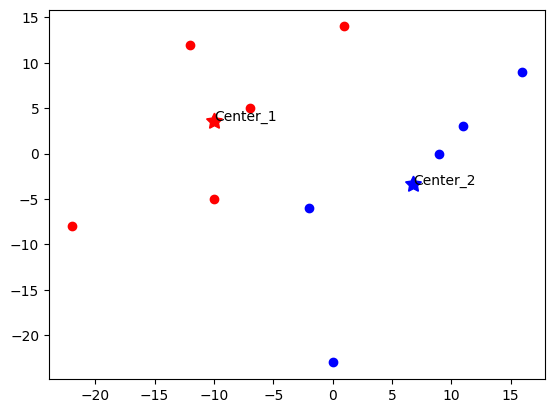

In [ ]:
# clustering members based on nearest centroid by finding the eucledian distance

while True:
    for i in points:
        distance_center_1 = distance(center_1, i)
        distance_center_2 = distance(center_2, i)
        if distance_center_1 < distance_center_2:
            cluster_1 = np.append(cluster_1, [i], axis=0)
        else:
            cluster_2 = np.append(cluster_2, [i], axis=0)

    new_c1 = np.mean(cluster_1, axis=0)
    new_c2 = np.mean(cluster_2, axis=0)

    if np.array_equal(new_c1, center_1) and np.array_equal(new_c2, center_2):
        print("\n\nClustering completed succesfully",
              "\nCentroids:", center_1, center_2,
              "\n\nCluster_1:\n", cluster_1, "\n\nCluster_2:\n", cluster_2)

        plt.plot(center_1[0], center_1[1], color="red", marker=(5, 1), markersize=12)
        plt.annotate("Center_1", xy=(center_1[0], center_1[1]))
        plt.plot(return_list(cluster_1, 0), return_list(cluster_1, 1), "ro")

        plt.plot(center_2[0], center_2[1], color="blue", marker=(5, 1), markersize=12)
        plt.annotate("Center_2", xy=(center_2[0], center_2[1]))
        plt.plot(return_list(cluster_2, 0), return_list(cluster_2, 1), "bo")
        plt.show()
        break
    else:
        center_1 = new_c1
        center_2 = new_c2
        print("\n\nCentroids have changed:", center_1, center_2,
              "\n\nCluster_1:\n", cluster_1, "\n\nCluster_2:\n", cluster_2, "\n")

    cluster_1 = np.empty((0, 2), int)
    cluster_2 = np.empty((0, 2), int)

**Dataset 2(*Iris Dataset*)**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand
from sklearn.model_selection import train_test_split

In [7]:
import pandas as pd
import numpy as np
import random as rand

# Load data
data = pd.read_csv('Iris.csv')

# Drop label column if it exists
if 'label' in data.columns:
    data = data.drop(columns=['label'])
elif 'Species' in data.columns:  # In case it's named 'Species'
    data = data.drop(columns=['Species'])

# Drop the first row safely
data = data.drop(index=0).reset_index(drop=True)

# Convert to list
all_vals = data.values.tolist()

# Function to generate K random centroids
def random_centroids(all_vals, K):
    centroids = []
    for i in range(K):
        centroid = all_vals[rand.randint(0, len(all_vals)-1)]
        centroids.append(centroid)
    return centroids

centroids = random_centroids(all_vals, 3)

# Function to assign clusters
def assign_cluster(all_vals, centroids):
    assignments = []

    for data_point in all_vals:
        dist_point_clust = []

        for centroid in centroids:
            # Compute Euclidean distance
            d_clust = np.linalg.norm(np.array(data_point, dtype=float) - np.array(centroid, dtype=float))
            dist_point_clust.append(d_clust)

        # Assign closest centroid index
        assignment = np.argmin(dist_point_clust)
        assignments.append(assignment)

    return assignments

# Assign clusters
assignments = assign_cluster(all_vals, centroids)
print(assignments)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
